TRIBENI SUBUDHI

Flight Price Prediction

In the blog post i will go through the whole proces of creating a machine learning model on Flight Price Prediction.

It provides information on the 
Airline: The name of the airline,
Date_of_Journey: The date of the journey,
Source: The source from which the service begins,
Destination: The destination where the service ends,
Route: The route taken by the flight to reach the destination,
Dep_Time: The time when the journey starts from the source,
Arrival_Time: Time of arrival at the destination,
Duration: Total duration of the flight,
Total_Stops: Total stops between the source and destination,
Additional_Info: Additional information about the flight,
Price: The price of the ticket.

The tourism industry is changing fast and this is attracting a lot more traveler each year.The airline industry is considered as one of the most sophisticated industry in using complex price stratergies.Now a days flight prices are quite unpredictable.The ticket price changes frequently.Customers are seeking to get the lowest price for their tickets,while airline companies are trying to keep their overall revenue as high as possible.Using technologies it is actually possible to reduce the uncertainity of flight prices.So here,we will be predicting the flight price using efficient machine learning techniques.

In [1]:
!pip install plotly

In [2]:
!pip install feature_engine

In [3]:
!pip install wikipedia

In [4]:
!pip install chart_studio

In [5]:
#lets import the necessary libraries
#loading dataframe libraries
import pandas as pd
#loading algebra libraries
import numpy as np
#loading visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#loading warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
#loading flight price prediction dataset
flight=pd.read_excel(r'C:\Users\tribe\OneDrive\Desktop\Data_Train.xlsx')
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


I will check whether the data contains any null values using isnull.sum method and then drop the null values using dropna method so that their is no discrepencies in our data by which i can predict precisely.

In [7]:
#checking th missing value
flight.isnull().values.any()

True

In [8]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
flight.dropna(inplace=True)

Observation:Now that our data is clean with no null values i will have to look at the data types.

In [10]:
#checking datatypes
flight.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Observation:it is observed that Date_of_Journey, Date_of_Journey and Arrival_Time has been assigned as object by default.i will convert this data type into time stamp to use this column for prediction.

In [11]:
#checking the unique values
flight["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [12]:
flight["Journey_date"]=pd.to_datetime(flight["Date_of_Journey"],format='%d/%m/%Y').dt.day

In [13]:
flight["Journey_month"]=pd.to_datetime(flight["Date_of_Journey"],format='%d/%m/%Y').dt.month

In [14]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Observation:converting date of journey into journey date and journey month to help our machine learning model understand and use the column for prediction.after doing so i will delete the date of journey column which will be no longer useful to me.

In [15]:
flight.drop(["Date_of_Journey"],axis=1,inplace=True)

Now i will be dealing with the departure time and arrival time feature beacuse the machine learning model wont be able to understand what the time is or what day it is.i will be fetching minutes and hours from both these columns.

In [16]:
flight["Dep_hour"]=pd.to_datetime(flight["Dep_Time"]).dt.hour
flight["Dep_min"]=pd.to_datetime(flight["Dep_Time"]).dt.minute
flight.drop(["Dep_Time"],axis=1,inplace=True)

In [17]:
flight["Arrival_hour"]=pd.to_datetime(flight["Arrival_Time"]).dt.hour
flight["Arrival_min"]=pd.to_datetime(flight["Arrival_Time"]).dt.minute
flight.drop(["Arrival_Time"],axis=1,inplace=True)

Now i will be processing the duration column as in some cases their is no hour term or minutes.i will be using the split function and then append OH or OM wherevr needed.

In [18]:
duration=list(flight["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2: #checking if duration contain only hour or mim
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m" #add 0 mim
        else:
            duration[i]= "0h " + duration[i] #add 0 hour
            
duration_hours=[]
duration_mins=[]
for i in range (len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [19]:
#adding duration hours and minutes list to flight
flight['Duration_Hours']=duration_hours
flight['Duration_mins']=duration_mins

In [20]:
flight.drop(['Duration'],axis=1,inplace=True)

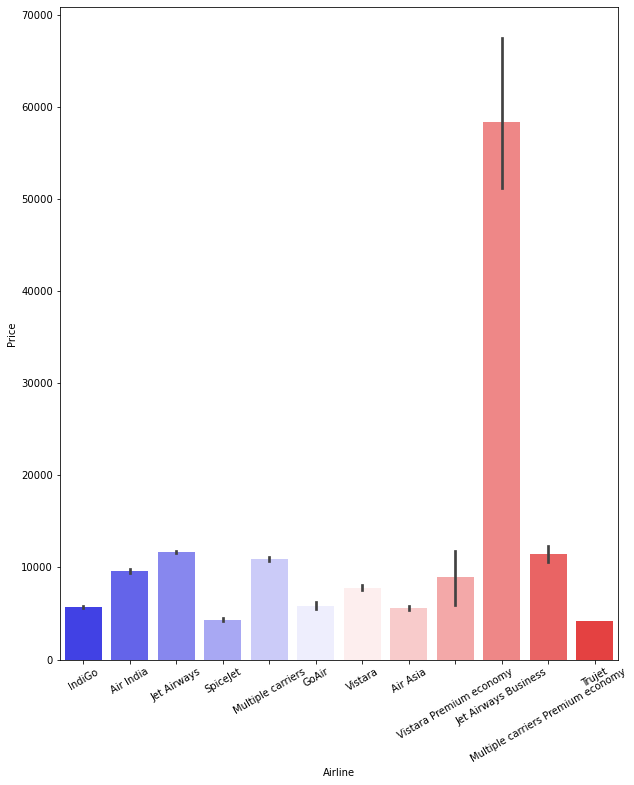

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [21]:
plt.figure(figsize=(10,12))
sns.barplot(x='Airline',y='Price',data=flight,palette='bwr')
plt.xticks(rotation=30)
plt.show()
print(flight['Airline'].value_counts())

Observation:In the above visualization i can see that the price of jet airways is more than all other flights followed by indigo,air india,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium economy,Jet Airways Business, Vistara Premium economy and price of Trujet is the lowest of all flights.

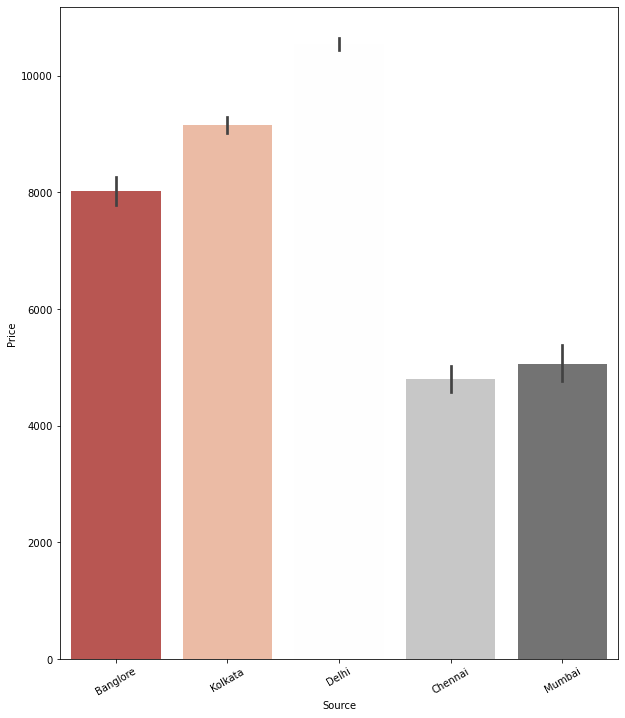

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


In [22]:
plt.figure(figsize=(10,12))
sns.barplot(x='Source',y='Price',data=flight,palette='RdGy')
plt.xticks(rotation=30)
plt.show()
print(flight['Source'].value_counts())

Observation:Delhi has the highest ticket price followed by Kolkata,Bangalore,Mumbai and Chennai has the lowest ticket price amongst all source.

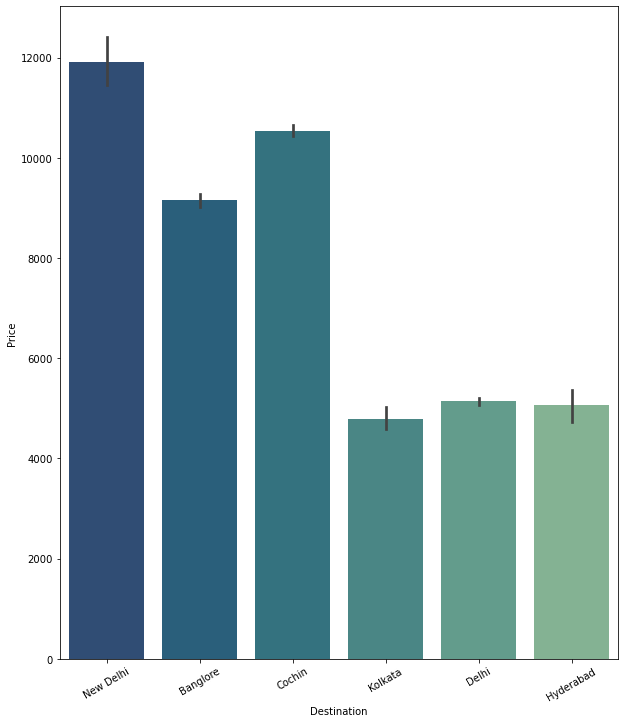

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [23]:
plt.figure(figsize=(10,12))
sns.barplot(x='Destination',y='Price',data=flight,palette='crest_r')
plt.xticks(rotation=30)
plt.show()
print(flight['Destination'].value_counts())

Observation:price of Cochin is highest that is 4536,followed by bangalore the price of which is 2871,then price of delhi is 1265,followed by new delhi,followed by hydrabad and the price of kolkata is the lowest that is 381.

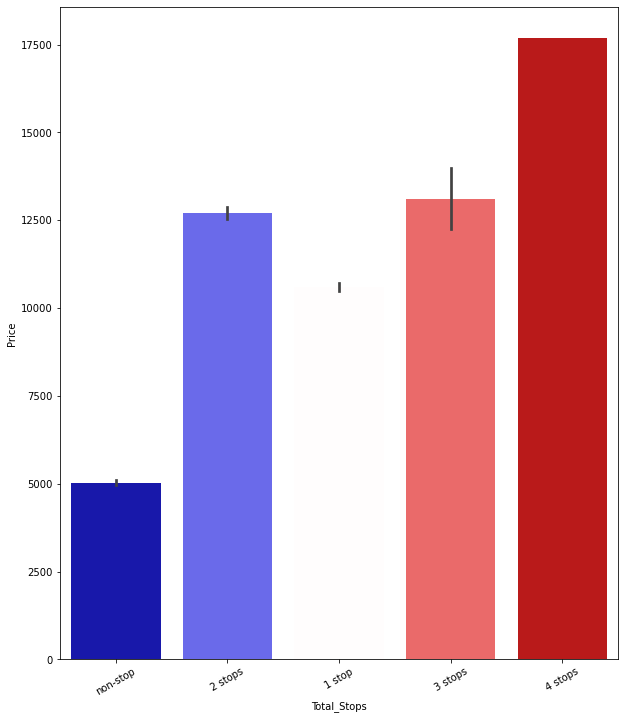

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


In [24]:
plt.figure(figsize=(10,12))
sns.barplot(x='Total_Stops',y='Price',data=flight,palette='seismic')
plt.xticks(rotation=30)
plt.show()
print(flight['Total_Stops'].value_counts())

Observation:Airlines with one or two stops has many outlaires and hence their price varies.On the contrary price of airlines with four top is not fluctuating.Hence,i will be changing the airline feature into integer format using one code encoder.

In [25]:
Airline=flight['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)

In [26]:
Source=flight['Source']
Source=pd.get_dummies(Source,drop_first=True)

In [27]:
Destination=flight['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)

Observation:the route column mailnly tell us that how many cities they have taken to reach from source to destination.so i split the route coplumn on the basis of separator to extract information.

In [28]:
flight.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [29]:
flight['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [30]:
flight.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [31]:
flight_train=pd.concat([flight,Airline,Source,Destination],axis=1)

In [32]:
flight_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [33]:
flight_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

Observation:concanating categorical data frame with all the data frames i have difined earlier.For this i have used concate from pandas library.Also i will be dropping the unnecessary columns present in the data set.

median plays very significant role where i have outlires so i will use where function to replace all the columns with price above 4000 with median values.

In [34]:
#dealiong with outlires
flight_train["Price"]=np.where(flight_train['Price']>4000,flight_train['Price'].median(),flight_train['Price'])

In [35]:
flight_train.dtypes

Total_Stops                            int64
Price                                float64
Journey_date                           int64
Journey_month                          int64
Dep_hour                               int64
Dep_min                                int64
Arrival_hour                           int64
Arrival_min                            int64
Duration_Hours                         int64
Duration_mins                          int64
Air India                              uint8
GoAir                                  uint8
IndiGo                                 uint8
Jet Airways                            uint8
Jet Airways Business                   uint8
Multiple carriers                      uint8
Multiple carriers Premium economy      uint8
SpiceJet                               uint8
Trujet                                 uint8
Vistara                                uint8
Vistara Premium economy                uint8
Chennai                                uint8
Delhi     

Model Building

In [36]:
x=flight_train.drop(columns=['Price'],axis=1)
y=flight_train['Price']

Observation:feature selection is nothing but to find the best feature that contributes the most and that has good relationship with the target values.The main reason to apply feature selection is to select important feature so that i do not face the problem of multiple dimension.I will pass the independent and dependent data to the mutual info classif function.

In [37]:
from sklearn.feature_selection import mutual_info_classif

In [38]:
mutual_info_classif(x,y)

array([0.13321936, 0.00566587, 0.05825489, 0.17486074, 0.13882375,
       0.18969993, 0.14241024, 0.27269262, 0.16068528, 0.03377929,
       0.01973159, 0.07012858, 0.06651251, 0.        , 0.01451062,
       0.        , 0.15190706, 0.00392399, 0.01582687, 0.        ,
       0.08845578, 0.06594877, 0.06709827, 0.13809165, 0.06784726,
       0.08114743, 0.13642582, 0.08646842, 0.01323597])

In [39]:
imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp

,0
Total_Stops,0.138762
Journey_date,0.002790
Journey_month,0.059520
Dep_hour,0.174915
Dep_min,0.136090
Arrival_hour,0.200905
Arrival_min,0.145894
Duration_Hours,0.279226
Duration_mins,0.168654
Air India,0.032969


In [40]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)
imp

,importance
Total_Stops,0.138762
Journey_date,0.002790
Journey_month,0.059520
Dep_hour,0.174915
Dep_min,0.136090
Arrival_hour,0.200905
Arrival_min,0.145894
Duration_Hours,0.279226
Duration_mins,0.168654
Air India,0.032969


Sorting values according to importance by which i will get to know which column contributes the most and which contributes the least.

spliting the data into train and test data.i have taken 80% data for training and remaining 20% for testing.

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [42]:
#importing all libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [43]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    prdm=m.predict(x_test)
    print('score_of',m,'is')
    print(mean_absolute_error(y_test,prdm))
    print(mean_squared_error(y_test,prdm))
    print(np.sqrt(mean_squared_error(y_test,prdm)))
    print(r2_score(y_test,prdm))
    print('*************************************************************************************')
    print('/n')

score_of LinearRegression() is
671.1195968597801
1285087.9107086498
1133.6171799636109
0.4993652271418775
*************************************************************************************
/n
score_of DecisionTreeRegressor() is
196.80215255030416
893461.5061488067
945.2309274186952
0.6519320628099088
*************************************************************************************
/n
score_of SVR() is
560.7930853841881
2881000.6786998156
1697.3510770314476
-0.12235832923649559
*************************************************************************************
/n
score_of RandomForestRegressor() is
203.84689831195166
587367.3786482771
766.398968324121
0.771177884607368
*************************************************************************************
/n


In [44]:
#RandomForest is giving good score amongst all other algorithm.So, will go ahead with the same.
parameters={"n_estimators":[400,500,600,700],'max_depth':[4,5,6,15,20]}
rfc=RandomForestRegressor()
clf=GridSearchCV(rfc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 600}


In [45]:
rf=RandomForestRegressor(n_estimators=500,min_samples_split=5,min_samples_leaf=1,max_features="auto",max_depth=15)
rf.fit(x_train,y_train)
prdrf=rf.predict (x_test)
print(rf.score(x_train,y_train))
print(mean_squared_error(y_test,prdrf))
print(mean_absolute_error(y_test,prdrf))
print(r2_score(y_test,prdrf))

0.9126021161575201
538390.0458017783
208.1155926309872
0.7902581013773494


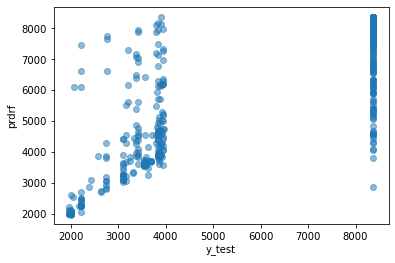

In [46]:
plt.scatter(y_test,prdrf,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prdrf')
plt.show()

I have achived approximately 91% accuracy of training data and 79% of test data which is very good under the circumstances of outlires as i have got random forest regressor as my best algorithm amongst all other algorithmns.

Conclusion:

In [47]:
Flight_price=np.array(y_test)

In [48]:
predicted_flight_price=np.array(rf.predict(x_test))

In [50]:
flight=pd.DataFrame({'Flight_price':Flight_price,'predicted_flight_price':predicted_flight_price},index=range(len(Flight_price)))

In [51]:
flight

,Flight_price,predicted_flight_price
0,8372.0,8372.000000
1,8372.0,8099.985556
2,8372.0,8372.000000
3,3858.0,3770.600836
4,8372.0,8372.000000
...,...,...
2132,8372.0,8372.000000
2133,8372.0,7627.383823
2134,8372.0,8372.000000
2135,8372.0,8372.000000


In [52]:
import pickle
filename='Flight_price_prediction.pkl'
pickle.dump(rf,open(filename,'wb'))